In [30]:
# show all outputs of a cell in a jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [31]:

# import libraries
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import os
import glob
import matplotlib.pyplot as plt
from matplotlib import image
from sklearn.utils import shuffle
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [32]:
data = pd.read_csv('data/survey_results.csv')

# Data exploration

In [33]:
data.head()
data.tail()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.
735,11/9/2022 1:55:20,29.0,YouTube Music,2.0,Yes,No,No,Hip hop,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Rarely,2.0,2.0,2.0,5.0,Improve,I understand.


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [35]:
data.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [36]:
data.isna().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [37]:
data['Fav genre'].value_counts()

Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
R&B                  35
Hip hop              35
Folk                 30
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                 10
Gospel                6
Latin                 3
Name: Fav genre, dtype: int64

In [38]:
data['BPM'].max()
data['BPM'].min()

# drop out of bounds bpm

data = data[(data['BPM'].isnull()) | (data['BPM'] >= 20) & (data['BPM'] <= 500)]

data['BPM'].max()
data['BPM'].min()

999999999.0

0.0

220.0

20.0

array([[<AxesSubplot: title={'center': 'Age'}>]], dtype=object)

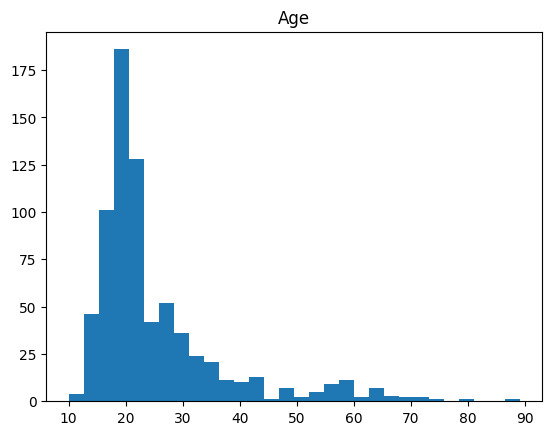

In [39]:
data.hist(['Age'], bins=30, grid=False)

In [40]:
# Find most represented age, min, max

data['Age'].value_counts().loc[lambda x : x>40]

data['Age'].describe()

18.0    85
19.0    61
17.0    59
21.0    52
16.0    42
Name: Age, dtype: int64

count    728.000000
mean      25.083791
std       11.859093
min       10.000000
25%       18.000000
50%       21.000000
75%       27.000000
max       89.000000
Name: Age, dtype: float64

Most of the respondents are teenagers or young adults. The person aged 89 might be an outlier.

<AxesSubplot: ylabel='Primary streaming service'>

Text(0.5, 1.0, 'Streaming services by popularity')

Text(0, 0.5, '')

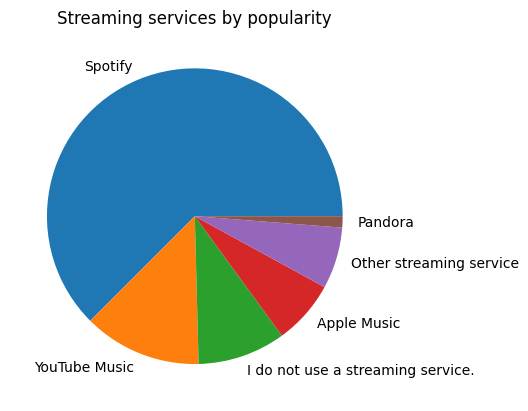

In [41]:
# Find popularity of services

services = data['Primary streaming service'].value_counts()
services.plot(kind='pie')

plt.title('Streaming services by popularity')
plt.ylabel("")

Text(0.5, 1.0, 'Streaming services by Age')

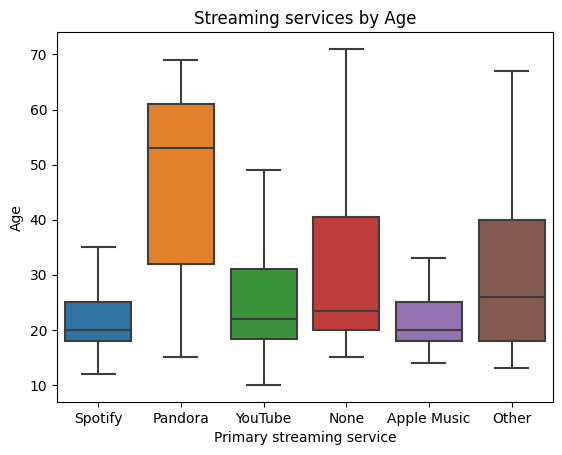

In [42]:
# Services vs. Age

import seaborn as sns

data.replace(['Other streaming service', 'I do not use a streaming service.', 'YouTube Music'],
                       ['Other', 'None', 'YouTube'], inplace=True)

bplot = sns.boxplot(data=data, x="Primary streaming service", y = "Age",
            showfliers = False)

plt.title('Streaming services by Age')

array([[<AxesSubplot: title={'center': 'Hours per day'}>]], dtype=object)

2.0    173
3.0    117
1.0    116
Name: Hours per day, dtype: int64

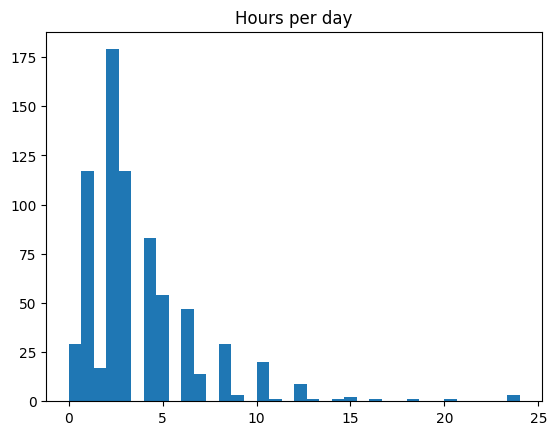

In [43]:
data.hist(['Hours per day'], bins='auto', grid=False)

data['Hours per day'].value_counts().loc[lambda x : x>100]

Most respondents listen to music 0-5 hours

In [44]:
data.replace(['No', 'Yes'], [0, 1], inplace=True)

/var/folders/9n/1mkfkhtn6nng31ppx9w_01lm0000gn/T/ipykernel_16338/3935332266.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_m = data.corr()


<AxesSubplot: >

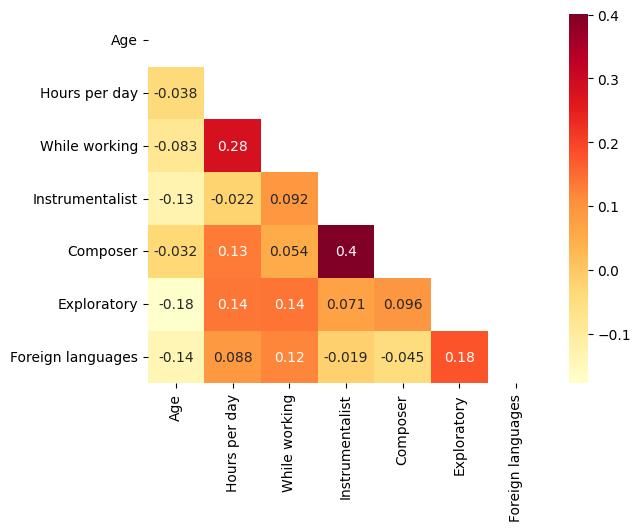

In [45]:
corr_m = data.corr()
corr_m1 = corr_m.iloc[:-5 , :-5]

mask = np.triu(corr_m1)

sns.heatmap(corr_m1, annot=True, mask=mask, cmap = 'YlOrRd')
plt.show()

Strong linear trends are mostly obvious correlation: Respondents who compose music are likely play instruments and vice-versa. Respondents who listen to music while working are likely to work for more hours.

Weaker linear trend: Respondents who listen to foreign languages tend to explore more. Respondents who are exploratory tend to listen for more hours per day and listen to music while working.

/var/folders/9n/1mkfkhtn6nng31ppx9w_01lm0000gn/T/ipykernel_16338/1430521517.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  anxiety_extreme = data.loc[(data['Anxiety'] > 8)].mean()[1]
/var/folders/9n/1mkfkhtn6nng31ppx9w_01lm0000gn/T/ipykernel_16338/1430521517.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  depression_extreme = data.loc[(data['Depression'] > 8)].mean()[1]
/var/folders/9n/1mkfkhtn6nng31ppx9w_01lm0000gn/T/ipykernel_16338/1430521517.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is de

<BarContainer object of 4 artists>

Text(0.5, 0, 'Avg hours listened')

Text(0.5, 1.0, 'Hours listened for individuals with extreme mental health rankings')

(3.0, 5.5)

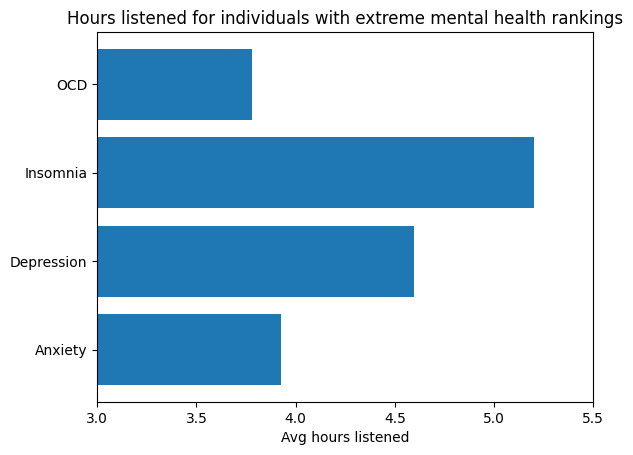

In [46]:
mental = ["Anxiety", "Depression", "Insomnia", "OCD"]

anxiety_extreme = data.loc[(data['Anxiety'] > 8)].mean()[1]
depression_extreme = data.loc[(data['Depression'] > 8)].mean()[1]
insomnia_extreme = data.loc[(data['Insomnia'] > 8)].mean()[1]
ocd_extreme = data.loc[(data['OCD'] > 8)].mean()[1]

extreme_means = [anxiety_extreme, depression_extreme, insomnia_extreme, ocd_extreme]

plt.barh(mental, extreme_means)
  
plt.xlabel("Avg hours listened")
plt.title("Hours listened for individuals with extreme mental health rankings")
plt.xlim(3,5.5)
plt.show()

/var/folders/9n/1mkfkhtn6nng31ppx9w_01lm0000gn/T/ipykernel_16338/896963723.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  anxiety_extreme = data.loc[(data['Anxiety'] <3)].mean()[1]
/var/folders/9n/1mkfkhtn6nng31ppx9w_01lm0000gn/T/ipykernel_16338/896963723.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  depression_extreme = data.loc[(data['Depression'] <3)].mean()[1]
/var/folders/9n/1mkfkhtn6nng31ppx9w_01lm0000gn/T/ipykernel_16338/896963723.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is depreca

<BarContainer object of 4 artists>

Text(0.5, 0, 'Avg hours listened')

Text(0.5, 1.0, 'Hours listened for individuals with low mental health rankings')

(3.0, 5.5)

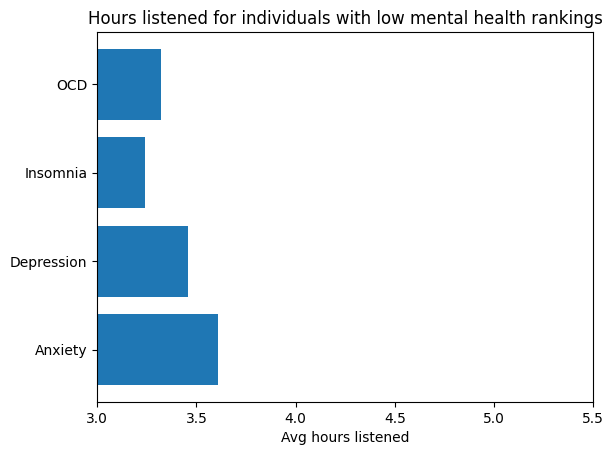

In [47]:
mental = ["Anxiety", "Depression", "Insomnia", "OCD"]

anxiety_extreme = data.loc[(data['Anxiety'] <3)].mean()[1]
depression_extreme = data.loc[(data['Depression'] <3)].mean()[1]
insomnia_extreme = data.loc[(data['Insomnia'] <3)].mean()[1]
ocd_extreme = data.loc[(data['OCD'] <3)].mean()[1]

extreme_means = [anxiety_extreme, depression_extreme, insomnia_extreme, ocd_extreme]

plt.barh(mental, extreme_means)
  
plt.xlabel("Avg hours listened")
plt.title("Hours listened for individuals with low mental health rankings")
plt.xlim(3,5.5)
plt.show()

On average, respondents who have a ranking of insomnia greater than 8 listen to music for approximately 5 hours. Conversely, respondents who have a ranking of insomnia less than 3 listen to music for less than 3.5 hours. In general, respondents with lower mental health rankings tend to listen to music for fewer hours.

/var/folders/9n/1mkfkhtn6nng31ppx9w_01lm0000gn/T/ipykernel_16338/1019729799.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_m = data.corr()


<AxesSubplot: >

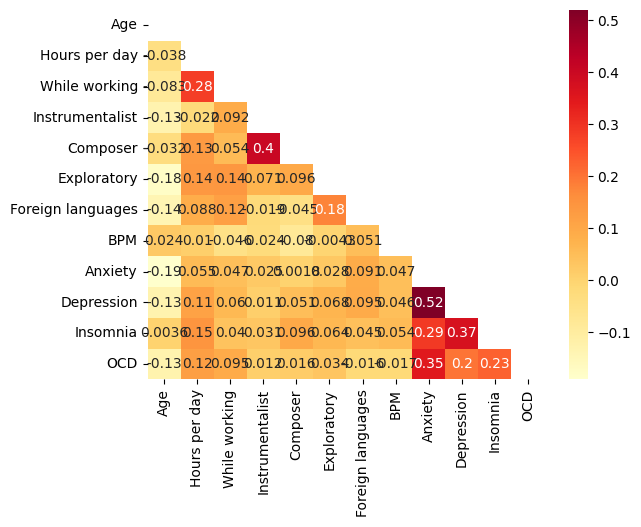

In [48]:
corr_m = data.corr()

mask = np.triu(corr_m)

sns.heatmap(corr_m, annot=True, mask=mask, cmap = 'YlOrRd')
plt.show()

In [49]:
data.replace(['Never', 'Rarely', 'Sometimes', 'Very frequently'], [0, 1, 2, 3], inplace=True)


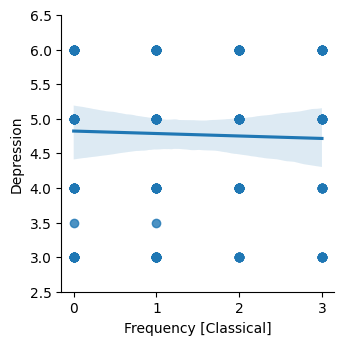

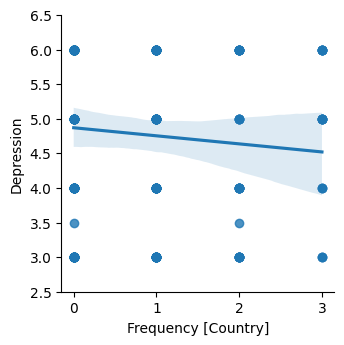

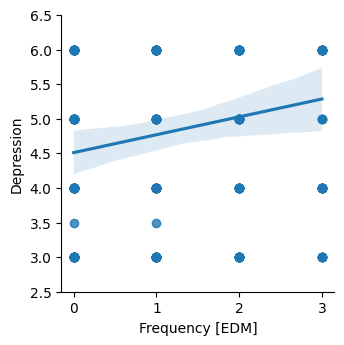

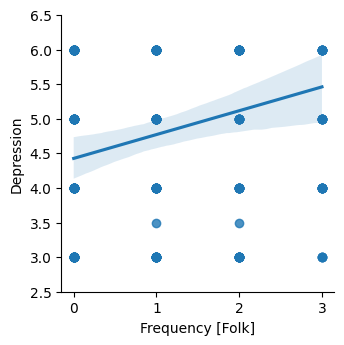

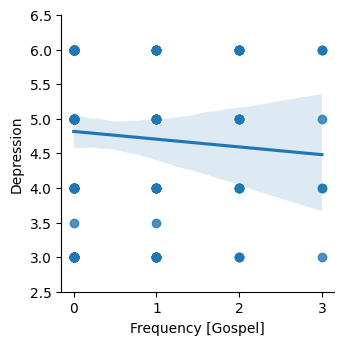

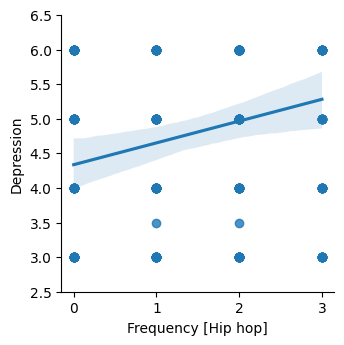

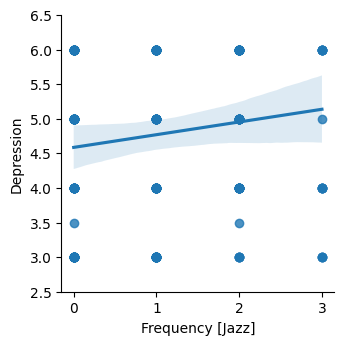

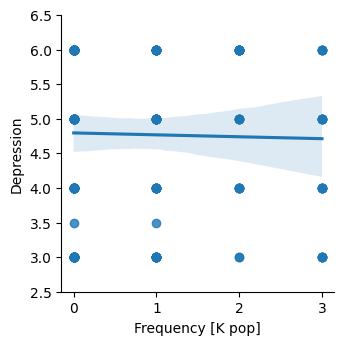

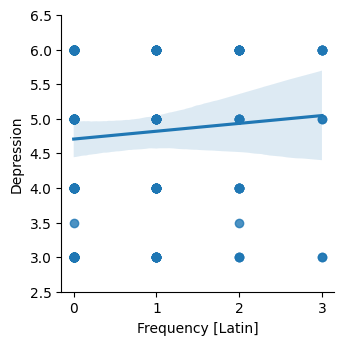

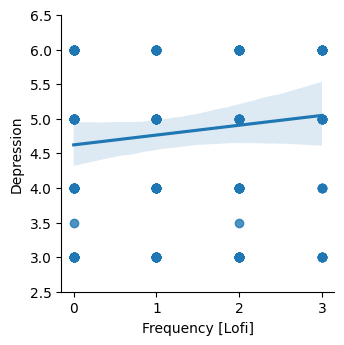

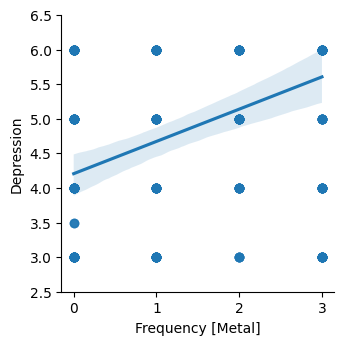

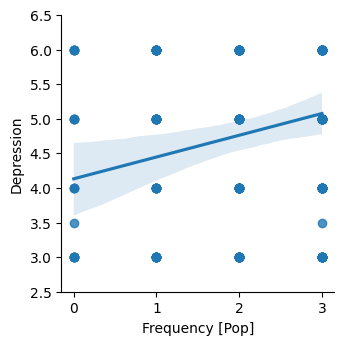

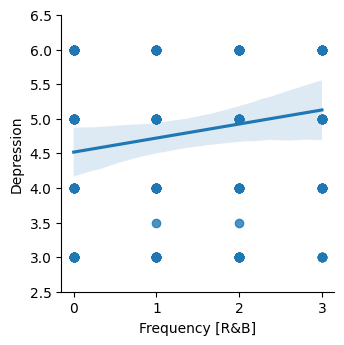

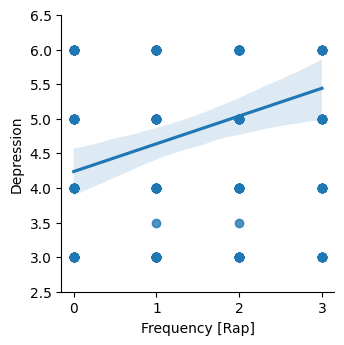

In [50]:
genres = ['Classical', 'Country', 'EDM', 'Folk', 'Gospel', 'Hip hop', 'Jazz', 'K pop', 'Latin', 
          'Lofi','Metal','Pop','R&B', 'Rap']

for genre in genres:
    fig = sns.lmplot(x=f'Frequency [{genre}]', y='Depression', data=data, height=3.5)
    fig.set(ylim=(2.5, 6.5))

In [51]:
data['MH Score'] = data['Anxiety'] + data['Depression'] + data['Insomnia'] + data['OCD']

print('Favorite genres of highest combined MH scorers:')
data.nlargest(60, ['MH Score'])['Fav genre'].value_counts()

print('Favorite genres of lowest combined MH scorers:')
data.nsmallest(60, ['MH Score'])['Fav genre'].value_counts()

Favorite genres of highest combined MH scorers:


Rock                17
Pop                 10
Metal                9
EDM                  6
R&B                  3
Folk                 2
K pop                2
Video game music     2
Classical            2
Lofi                 2
Jazz                 2
Country              1
Hip hop              1
Rap                  1
Name: Fav genre, dtype: int64

Favorite genres of lowest combined MH scorers:


Rock                14
Metal                8
Classical            7
Pop                  6
Country              6
R&B                  5
EDM                  3
Gospel               2
Jazz                 2
K pop                2
Video game music     2
Rap                  1
Folk                 1
Latin                1
Name: Fav genre, dtype: int64